<br><br><font size=6><b>Project 3: </b></font><font size=6>Part 2 - <span style="color:#88618A;font-size:29px;">Exploratory Data Analysis</span></font>

<font size=3><ul><li>Suganthan Thamotharampillai
<br><li>02.08.2023

<br><font size=5><b>Imports

In [24]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, tmdbsimple as tmdb
#pd.options.display.max_colwidth=12

<br><font size=5><b>Data

In [25]:
# Load in csv.gz's of results for each year extracted.
tmdb_2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz")
tmdb_2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz")

<br><font size=5><b>Dataframe Concatenation

In [26]:
# Concatenate the data into 1 dataframe for the remainder of the analysis
df = pd.concat([tmdb_2000, tmdb_2001])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw...,NaN,10000000.0,[{'id': ...,NaN,62127.0,en,The Fant...,...,0.0,86.0,[{'engli...,Released,Try to r...,The Fant...,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,[{'id': ...,NaN,110977.0,en,For the ...,...,0.0,100.0,[{'engli...,Released,The ulti...,For the ...,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,[{'id': ...,NaN,442869.0,hi,Gang,...,0.0,152.0,[{'engli...,Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGz...,NaN,150000.0,[{'id': ...,NaN,843.0,cn,花樣年華,...,12854953.0,99.0,[{'engli...,Released,Feel the...,In the M...,0.0,8.113,2112.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,tt7797670,0.0,NaN,NaN,0.0,[{'id': ...,NaN,956214.0,en,Edmund K...,...,0.0,91.0,[],Released,NaN,Edmund K...,0.0,0.000,0.0,NaN
1298,tt7797790,0.0,NaN,NaN,0.0,[{'id': ...,NaN,956219.0,en,Edmund K...,...,0.0,72.0,[{'engli...,Released,NaN,Edmund K...,0.0,0.000,0.0,NaN
1299,tt8665056,0.0,NaN,NaN,0.0,[{'id': ...,http://s...,885436.0,en,Guns Alo...,...,0.0,85.0,[],Released,Evil cam...,Guns Alo...,0.0,0.000,0.0,NaN
1300,tt8795764,0.0,NaN,NaN,0.0,[{'id': ...,https://...,871624.0,en,New Breed,...,0.0,57.0,[{'engli...,Released,NaN,New Breed,0.0,0.000,0.0,NR


<br><br><br><font size=6><b>Exploratory Data Analysis

<font size=3><b>Exploratory</b> Visualization

<b><span style="color:#88618A">1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [27]:
df[(df['budget'] > 0) | (df['revenue'] > 0)].head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw...,NaN,10000000.0,[{'id': ...,NaN,62127.0,en,The Fant...,...,0.0,86.0,[{'engli...,Released,Try to r...,The Fant...,0.0,5.500,22.0,NaN
4,tt0118694,0.0,/n4GJFGz...,NaN,150000.0,[{'id': ...,NaN,843.0,cn,花樣年華,...,12854953.0,99.0,[{'engli...,Released,Feel the...,In the M...,0.0,8.113,2112.0,PG
6,tt0119273,0.0,/f5C03do...,{'id': 1...,15000000.0,[{'id': ...,NaN,16225.0,en,Heavy Me...,...,0.0,88.0,[{'engli...,Released,not to s...,Heavy Me...,0.0,6.100,175.0,R


In [28]:
# FILTERING
df['Movie_Financially_Valued'] = np.where((df['budget'] > 0) | (df['revenue'] > 0), True, False)

# Sample & Value Counts
display(df[['original_title','budget','revenue','Movie_Financially_Valued']].sample(5))
display(df['Movie_Financially_Valued'].value_counts())

,original_title,budget,revenue,Movie_Financially_Valued
494,Love Her...,0.0,0.0,False
800,Princesa,0.0,0.0,False
51,Still Life,100.0,0.0,True
861,Honeybee,250000.0,0.0,True
742,Not Anot...,16000000.0,66468332.0,True


False    1894
True      628
Name: Movie_Financially_Valued, dtype: int64

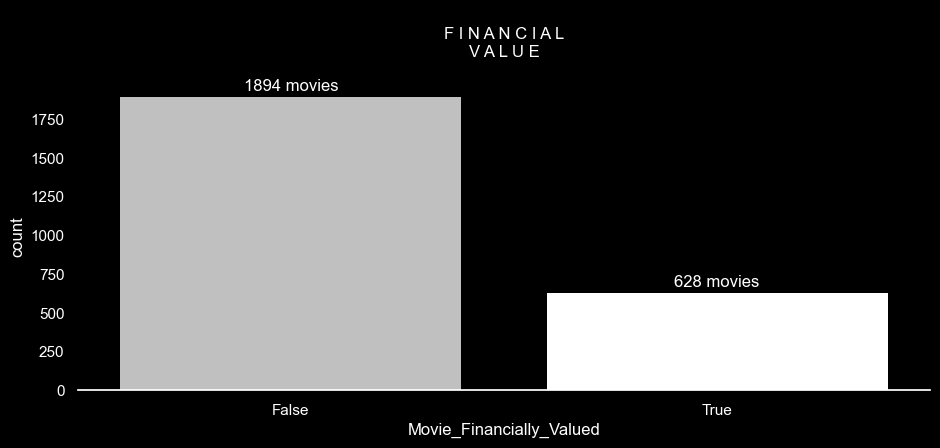

In [29]:
## MOVIES GRAPH WITH FINANCIAL VALUES
plt.figure(facecolor='#000'); sns.set(rc = {'figure.figsize':(11,4)});
plt.style.use("dark_background"); plt.grid(visible=None);
sns.despine(left=True, top=True, right=True);
plotts = sns.countplot(data=df, x='Movie_Financially_Valued', palette = ['silver',"white"], linewidth=0) #['#432371',"#FAAE7B"]
for bar in plotts.patches:
    plotts.annotate(format(str(round(bar.get_height()))+' movies'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points');plt.title("\nF I N A N C I A L\nV A L U E\n");

<br><b><span style="color:#88618A">2. Please exclude any movies with 0's for budget AND revenue for the remaining visualizations.

In [30]:
# Excluding 0's for budget AND revenue
df = df[~((df['budget']==0) & (df['revenue']==0))]
df.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Movie_Financially_Valued
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,tt0113026,0.0,/vMFs7nw...,NaN,10000000.0,[{'id': ...,NaN,62127.0,en,The Fant...,...,86.0,[{'engli...,Released,Try to r...,The Fant...,0.0,5.500,22.0,NaN,True
4,tt0118694,0.0,/n4GJFGz...,NaN,150000.0,[{'id': ...,NaN,843.0,cn,花樣年華,...,99.0,[{'engli...,Released,Feel the...,In the M...,0.0,8.113,2112.0,PG,True


<br><b><span style="color:#88618A">3. How many movies are there in each of the certification categories (G/PG/PG-13/R)?

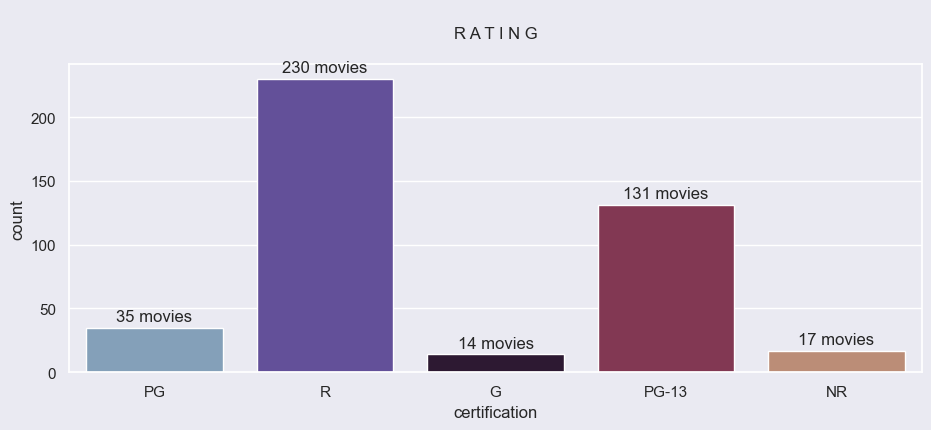

In [74]:
# FEATURE:'RATING'
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(11,4)});
plotss = sns.countplot(data=df, x=df['certification'], palette = "twilight")
for bar in plotss.patches:
    plotss.annotate(format(str(round(bar.get_height()))+' movies'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points');plt.title("\nR A T I N G\n");

<br><b><span style="color:#88618A">4. What is the average revenue per certification category?

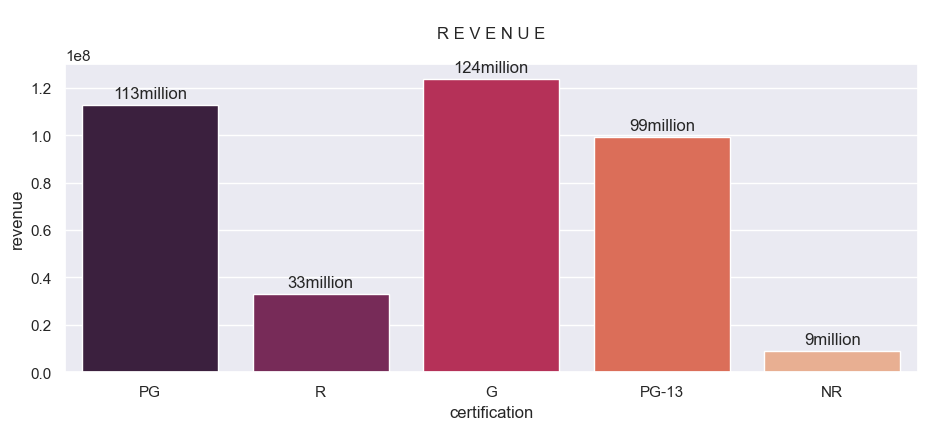

In [80]:
# Revenue by Rating
plots = sns.barplot(x="certification", y="revenue", data=df, palette = "rocket", errorbar=None);
for bar in plots.patches:
    plots.annotate(format(str(round(bar.get_height()/1000000))+'million'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points');plt.title("\nR E V E N U E\n")

<b><span style="color:#88618A">5. What is the average budget per certification category?

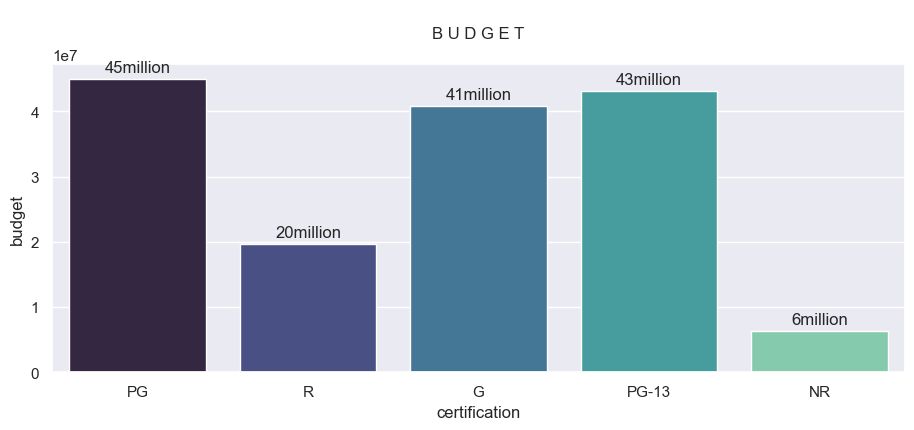

In [81]:
# Budget by Rating
plot = sns.barplot(x="certification", y="budget", data=df, palette = "mako", errorbar=None); 
for bar in plot.patches:
    plot.annotate(format(str(round(bar.get_height()/1000000))+'million'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points');plt.title("\nB U D G E T\n")

<br><font size=5><b>Final Save

In [13]:
# Save to Folder
df.to_csv("Data/tmdb_results_combined.csv.gz", compression='gzip', index=False)

In [14]:
# Check file Extant
if os.path.isfile("Data/tmdb_results_combined.csv.gz") == True:
        print("The Combined TMDB Results file is Successfully Created.")

The Combined TMDB Results file is Successfully Created.


<div style="background-color:#0d253f;height: 50px;
  width: 100%;margin-left:-5px;"><img style="margin:15px;" src="https://www.themoviedb.org/assets/2/v4/logos/v2/blue_short-8e7b30f73a4020692ccca9c88bafe5dcb6f8a62a4c6bc55cd9ba82bb2cd95f6c.svg" align="left" width=154 height=20 alt="My Image" /><span align="right" style="display:inline-block;float:right;padding:15px;color:#01b4e4;opacity:.6;">Information courtesy of IMDb (<a href="https://www.imdb.com/">https://www.imdb.com</a>). Used with permission.</span></div>